In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re


sns.set(style="whitegrid")

In [118]:
file_path = 'data/listings.csv'
df = pd.read_csv(file_path)

df = df.drop_duplicates()

df.dropna(subset=['price', 'bedrooms', 'review_scores_rating', 'beds','accommodates', 'bathrooms', 'availability_365', 'number_of_reviews', 'reviews_per_month'], inplace=True)

def extract_bathrooms(bathrooms_text):
    try:
        return float(bathrooms_text.split()[0])
    except:
        return np.nan

df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms_text'].apply(extract_bathrooms))

df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

df['first_review'] = pd.to_datetime(df['first_review'])
df['last_review'] = pd.to_datetime(df['last_review'])



In [119]:
import unicodedata

def remove_unicode(text):
    return ''.join(
        ch for ch in unicodedata.normalize('NFKD', text)
        if not unicodedata.combining(ch)
    )

def clean_amenities(amenities):
    amenities_list = re.findall(r'[\w\s\']+', amenities.strip('{}'))
    cleaned_list = [' '.join(remove_unicode(amenity).strip(' "\',').split()) for amenity in amenities_list]
    return [amenity for amenity in cleaned_list if amenity]

In [120]:
df['amenities'] = df['amenities'].apply(clean_amenities)

print(df.head())


                    id                                      listing_url  \
3   785706334254160321  https://www.airbnb.com/rooms/785706334254160321   
4             38675099            https://www.airbnb.com/rooms/38675099   
5   711651903116237219  https://www.airbnb.com/rooms/711651903116237219   
6             17188701            https://www.airbnb.com/rooms/17188701   
10  660814025913716692  https://www.airbnb.com/rooms/660814025913716692   

         scrape_id last_scraped       source  \
3   20240604143925   2024-06-04  city scrape   
4   20240604143925   2024-06-04  city scrape   
5   20240604143925   2024-06-04  city scrape   
6   20240604143925   2024-06-04  city scrape   
10  20240604143925   2024-06-04  city scrape   

                                               name  \
3                             Mint Hill One Bedroom   
4     #aD43 Double Sunny Room in near SoMa / Center   
5   Pristine 1 bedroom unit near Mission Dolores SF   
6                             Cozy Singl

In [121]:
columns_to_drop = [
    'listing_url', 'scrape_id', 'last_scraped', 'source', 'description', 'host_url',	'neighborhood_overview', 'picture_url', 'host_location', 
    'host_about','host_response_time', 'host_response_rate', 'host_acceptance_rate','host_thumbnail_url', 'host_picture_url','host_neighbourhood', 
    'host_verifications', 'host_has_profile_pic','host_identity_verified', 'calendar_updated','calendar_last_scraped', 'license', 'instant_bookable', 
    'calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms',
    'neighbourhood_group_cleansed', 'neighbourhood','property_type','minimum_nights','maximum_nights','minimum_minimum_nights','number_of_reviews_l30d',
    'maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','number_of_reviews_ltm',
    'maximum_nights_avg_ntm','has_availability','availability_30','availability_60','availability_90','review_scores_accuracy',
    'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value', 
    'minimum_nights', 'bathrooms_text','host_since','host_is_superhost'

]

df = df.drop(columns=columns_to_drop)

df.to_csv('data/cleaned.csv', index=False)

Top 10 Neighborhoods with the Highest Number of Listings:
neighbourhood_cleansed
Downtown/Civic Center    435
Mission                  424
Western Addition         333
South of Market          308
Outer Sunset             296
Bernal Heights           237
Castro/Upper Market      227
Nob Hill                 201
Noe Valley               180
Haight Ashbury           165
Name: count, dtype: int64

Bottom 10 Neighborhoods with the Lowest Number of Listings:
neighbourhood_cleansed
Visitacion Valley    55
Twin Peaks           50
Lakeshore            49
Glen Park            42
Crocker Amazon       29
Presidio Heights     27
Seacliff             14
Diamond Heights      10
Presidio              9
Golden Gate Park      3
Name: count, dtype: int64


C:\Users\antra\AppData\Local\Temp\ipykernel_27516\1663811631.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, palette="viridis")


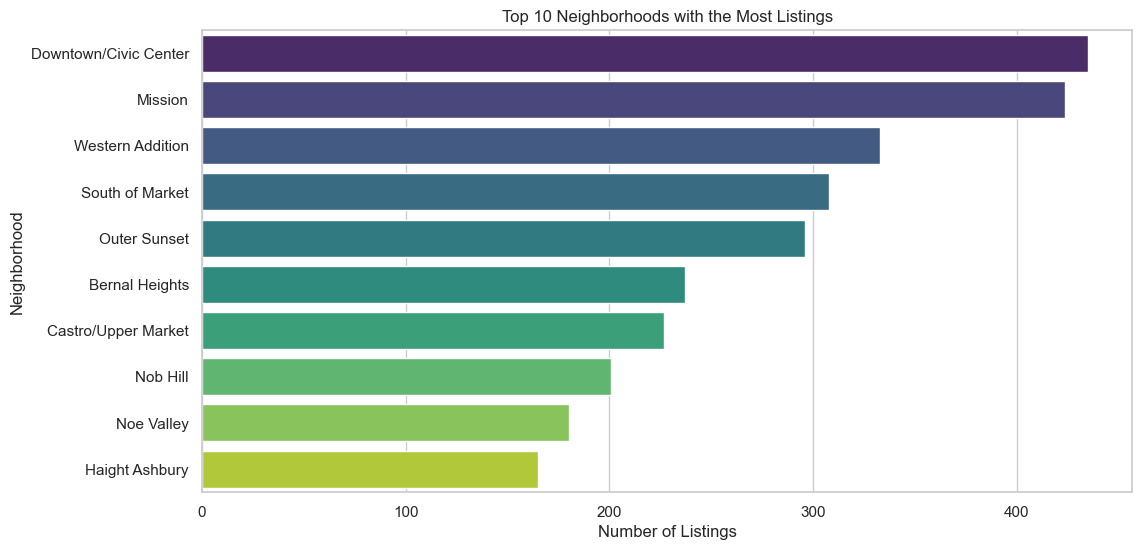

In [122]:
# Count the number of listings per neighborhood
neighborhood_counts = df['neighbourhood_cleansed'].value_counts()

# Top 10 Neighborhoods
top_neighborhoods = neighborhood_counts.head(10)
print("Top 10 Neighborhoods with the Highest Number of Listings:")
print(top_neighborhoods)

# Bottom 10 Neighborhoods
bottom_neighborhoods = neighborhood_counts.tail(10)
print("\nBottom 10 Neighborhoods with the Lowest Number of Listings:")
print(bottom_neighborhoods)

# Plotting the results
plt.figure(figsize=(12, 6))
sns.barplot(x=top_neighborhoods.values, y=top_neighborhoods.index, palette="viridis")
plt.title('Top 10 Neighborhoods with the Most Listings')
plt.xlabel('Number of Listings')
plt.ylabel('Neighborhood')
plt.show()


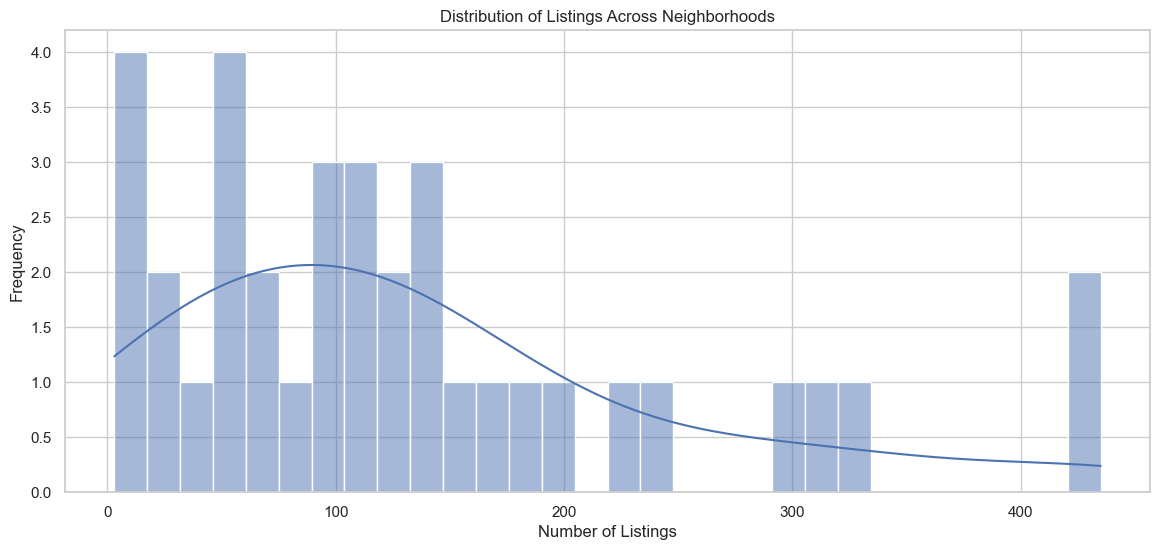

In [123]:
plt.figure(figsize=(14, 6))
sns.histplot(neighborhood_counts, bins=30, kde=True)
plt.title('Distribution of Listings Across Neighborhoods')
plt.xlabel('Number of Listings')
plt.ylabel('Frequency')
plt.show()


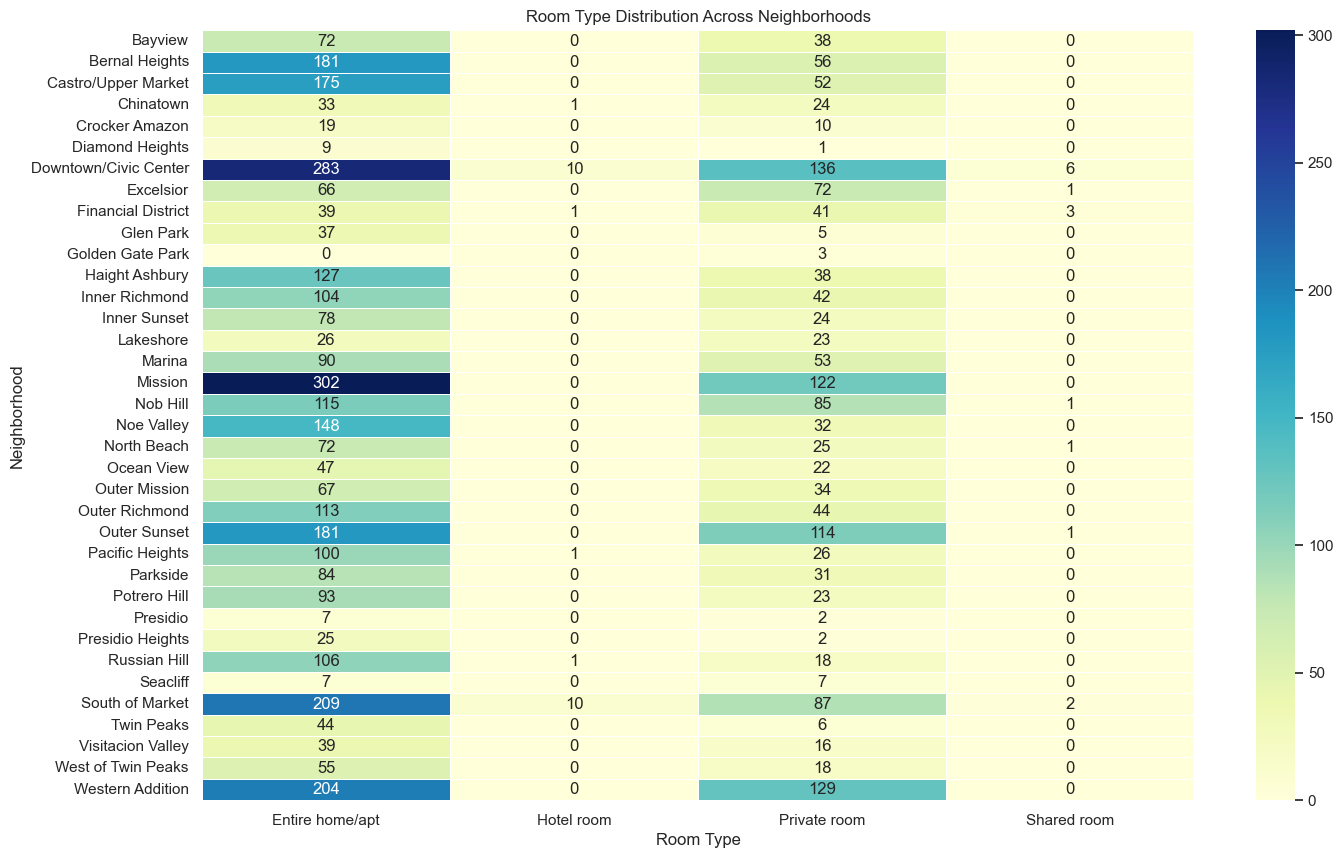

In [124]:
room_type_distribution = df.groupby(['neighbourhood_cleansed', 'room_type']).size().unstack(fill_value=0)

plt.figure(figsize=(16, 10))
sns.heatmap(room_type_distribution, cmap="YlGnBu", linewidths=.5, annot=True, fmt="d")
plt.title('Room Type Distribution Across Neighborhoods')
plt.xlabel('Room Type')
plt.ylabel('Neighborhood')
plt.show()


Number of Outliers: 390
                 id       host_id  host_listings_count  \
count  3.900000e+02  3.900000e+02           390.000000   
mean   3.041823e+17  9.771360e+07            81.394872   
min    8.339000e+03  2.421500e+04             1.000000   
25%    1.071891e+07  4.119015e+06             1.000000   
50%    4.209402e+07  2.072659e+07             2.000000   
75%    7.344061e+17  1.242219e+08             4.000000   
max    1.142907e+18  5.680601e+08          2880.000000   
std    4.071494e+17  1.507755e+08           424.086059   

       host_total_listings_count    latitude   longitude  accommodates  \
count                 390.000000  390.000000  390.000000    390.000000   
mean                  106.571795   37.774404 -122.431492      6.269231   
min                     1.000000   37.717330 -122.509910      1.000000   
25%                     1.000000   37.758468 -122.442465      5.000000   
50%                     3.000000   37.775874 -122.431681      6.000000   
75%      

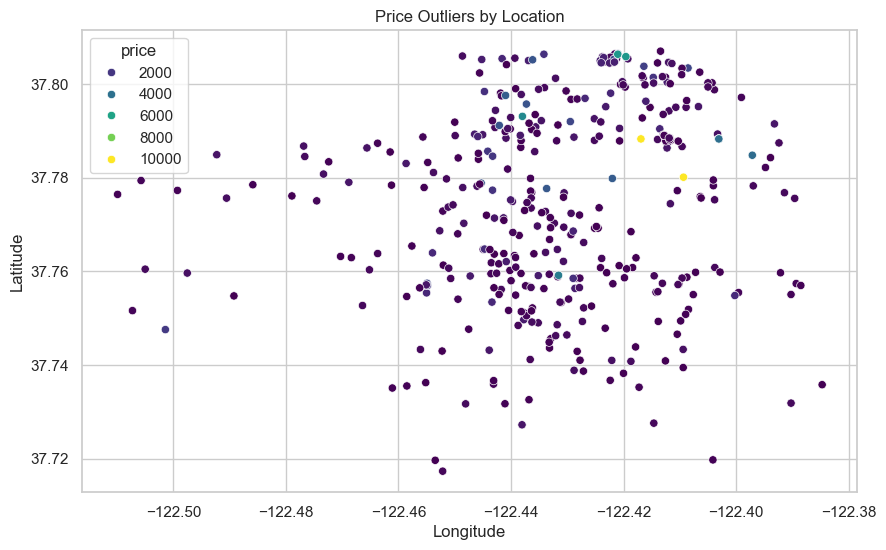

In [125]:
# Identifying outliers using the IQR method
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['price'] < (Q1 - 1.5 * IQR)) | (df['price'] > (Q3 + 1.5 * IQR))]
print(f"Number of Outliers: {len(outliers)}")

# Analyzing characteristics of the outliers
outlier_summary = outliers.describe()
print(outlier_summary)

# Plotting the outliers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='price', palette='viridis', data=outliers)
plt.title('Price Outliers by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


Original data shape: (4857, 23)
Filtered data shape: (2504, 23)


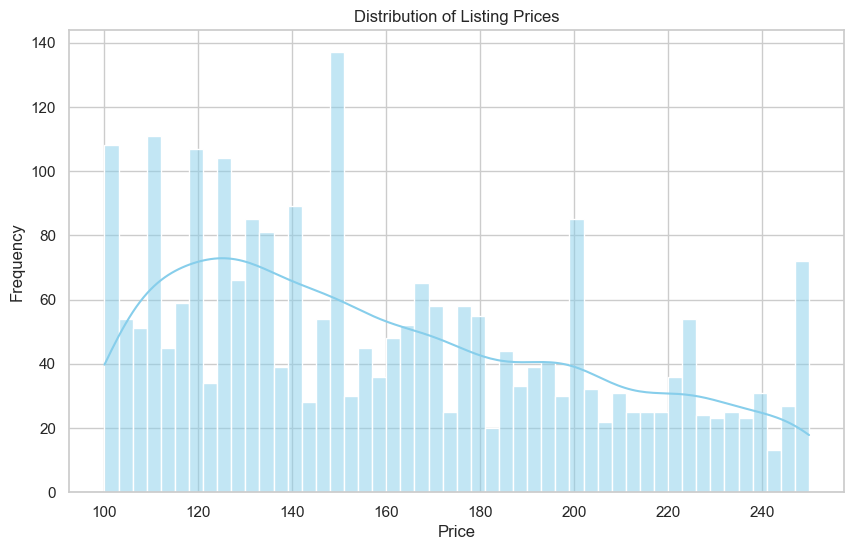

In [126]:
print(f"Original data shape: {df.shape}")

lower_percentile = df['price'].quantile(0.25)
upper_percentile = df['price'].quantile(0.75)

df = df[(df['price'] >= lower_percentile) & (df['price'] <= upper_percentile)]

# Print the new shape of the filtered data

print(f"Filtered data shape: {df.shape}")

# Display the distribution of the filtered prices
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Listing Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



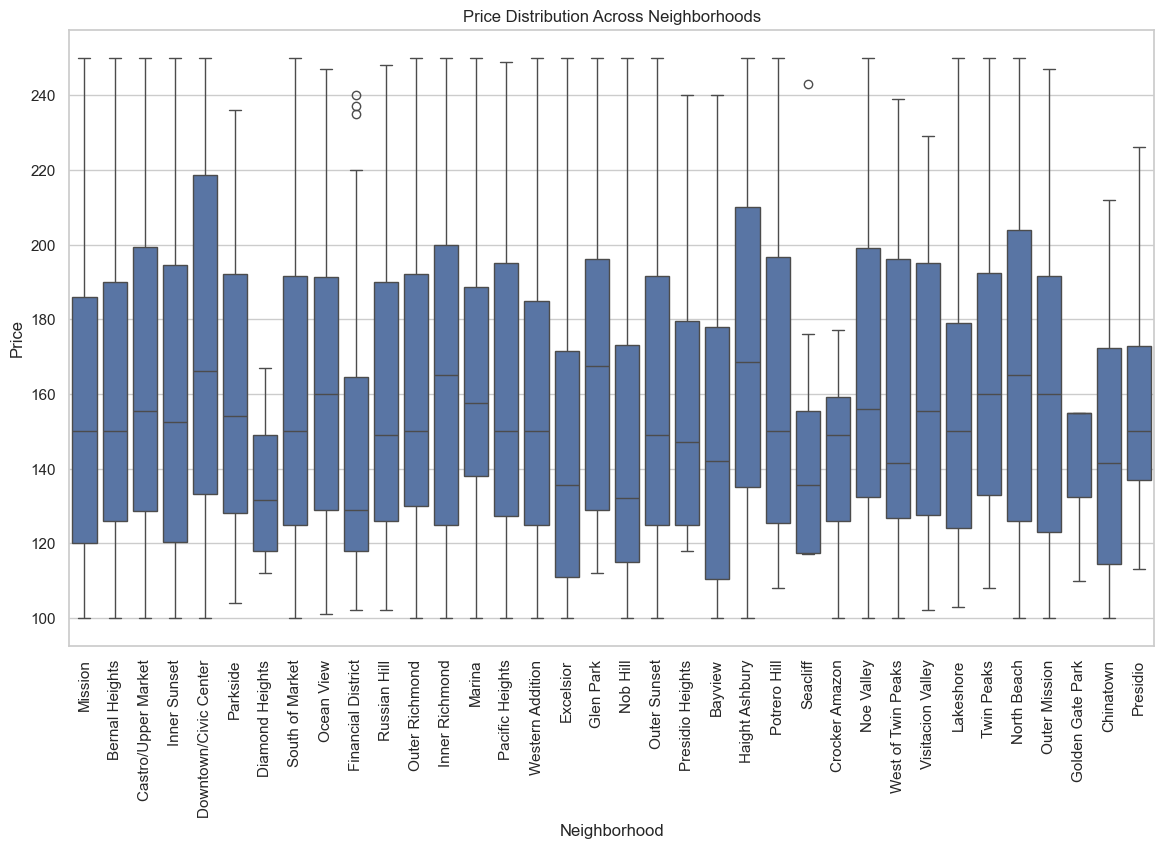

In [127]:
# Plotting the price distribution by neighborhood
plt.figure(figsize=(14, 8))
sns.boxplot(x='neighbourhood_cleansed', y='price', data=df)
plt.xticks(rotation=90)
plt.title('Price Distribution Across Neighborhoods')
plt.xlabel('Neighborhood')
plt.ylabel('Price')
plt.show()


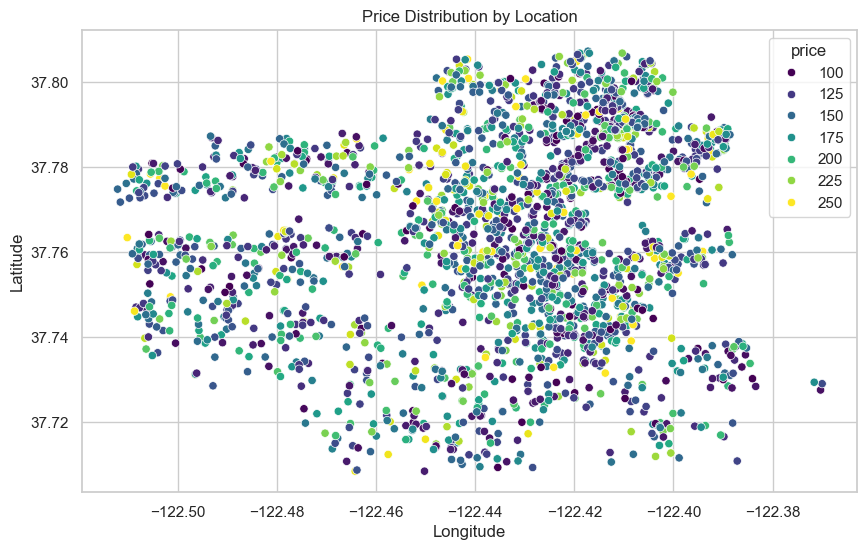

In [130]:
# Scatter plot of price vs. latitude and longitude
plt.figure(figsize=(10, 6))
sns.scatterplot(x='longitude', y='latitude', hue='price', palette='viridis', data=df)
plt.title('Price Distribution by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [141]:
df['log_price'] = np.log(df['price'])

# Selecting only numerical columns
numerical_df = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numerical_df.corr()
print(correlation_matrix['log_price'].sort_values(ascending=False))



log_price                         1.000000
price                             0.992490
accommodates                      0.359273
bedrooms                          0.293669
beds                              0.269428
bathrooms                         0.212823
num_amenities                     0.141799
id                                0.131730
host_total_listings_count         0.120936
host_listings_count               0.114836
host_id                           0.085026
review_scores_rating              0.056692
latitude                          0.038150
calculated_host_listings_count    0.015813
longitude                        -0.010520
reviews_per_month                -0.016633
availability_365                 -0.052724
number_of_reviews                -0.078966
Name: log_price, dtype: float64


In [143]:
from sklearn.linear_model import LassoCV

# Selecting features and target
X = df[['accommodates' ,'availability_365','review_scores_rating', 'num_amenities']]
y = df['log_price']

# Lasso feature selection
lasso = LassoCV(cv=5).fit(X, y)

# Selecting features with non-zero coefficients
selected_features = X.columns[(lasso.coef_ != 0)]
print("Selected features:", selected_features)


Selected features: Index(['accommodates', 'availability_365', 'review_scores_rating',
       'num_amenities'],
      dtype='object')


In [144]:
# Remove top and bottom 1% of the log-transformed price
lower_bound = df['log_price'].quantile(0.01)
upper_bound = df['log_price'].quantile(0.99)

df = df[(df['log_price'] > lower_bound) & (df['log_price'] < upper_bound)]

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X[selected_features])


In [145]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
mean_mse = -cv_scores.mean()
print(f'Mean MSE from cross-validation: {mean_mse}')

# Train model and evaluate on test set
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {test_mse}')


Mean MSE from cross-validation: 0.061765977241635274
Test MSE: 0.06330258340307365


In [146]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_
print(f'Best parameters: {best_params}')
print(f'Best cross-validation MSE: {best_score}')


Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200}
Best cross-validation MSE: 0.056793593093128106
